<a href="https://colab.research.google.com/github/ErsinDemirel94/docs2graph/blob/main/graph_prototype_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input Files

Aşağıda liste şeklinde verilen paragraflar işlenerek, isimli varlıklar tespit edilir(named entity recognition). Aynı varlığı ifade eden tespitler düzeltilir. (deduplication)İki farklı varlığın aynı paragrafta bahsi geçiyorsa aralarında bağlantı tanımlanır. (co-occurrence graph)

In [ ]:
with open('dummy_text.txt') as f:
    lines = f.readlines()

lines = [i.replace("\n","") for i in lines] 
list_of_paragraphs = [ele for ele in lines if len(ele) > 1]
list_of_paragraphs

["Bu ilanda Mehmet Demir'in ortağı olduğu Vestel A.Ş'ye dair bilgiler paylaşılacaktır. Bu firmanın diğer, ortakları ise sırasıyla Ayşe Yeşil ve Fatma Kara'dır.",
 "Bu diğer ilanda ise 1995 yılında kurulan Borok Anonim Şirketi'nin konkardatosu ilan edilmiştir. Bu durumda Fatma Kara ve Halis Uçak işsiz kalacaktır.",
 "1994'daki karar üzerine Karpuzlu AVM'nin üst kuruluşu Yetişen Holding'in yönetim kurulu başkanı Halis Uçak, Antalya'ya yerleşmiştir.",
 "Yetişen Holdingin bir diğer önemli kişisi Kaan Gök, Mollalar LTD. ŞTİ'nin sahibidir.",
 'Geçenlerde Kaan gok bir açıklama yaptı. Bu açıklama da Borok firmasında çalışan Fatma Kara ile ilgiliydi. Ve çok önemliydi.']

In [ ]:
import json

# list_of_paragraphs
ilans = []
for idx, paragraphs in enumerate(list_of_paragraphs):
  dct_ = {"ilan_id":idx,
  "ilan_text":paragraphs}
  ilans.append(dct_)

#j$sonString = json.dumps(output)

print(ilans)


# ilan_id, ilan_text in ilans

[{'ilan_id': 0, 'ilan_text': "Bu ilanda Mehmet Demir'in ortağı olduğu Vestel A.Ş'ye dair bilgiler paylaşılacaktır. Bu firmanın diğer, ortakları ise sırasıyla Ayşe Yeşil ve Fatma Kara'dır."}, {'ilan_id': 1, 'ilan_text': "Bu diğer ilanda ise 1995 yılında kurulan Borok Anonim Şirketi'nin konkardatosu ilan edilmiştir. Bu durumda Fatma Kara ve Halis Uçak işsiz kalacaktır."}, {'ilan_id': 2, 'ilan_text': "1994'daki karar üzerine Karpuzlu AVM'nin üst kuruluşu Yetişen Holding'in yönetim kurulu başkanı Halis Uçak, Antalya'ya yerleşmiştir."}, {'ilan_id': 3, 'ilan_text': "Yetişen Holdingin bir diğer önemli kişisi Kaan Gök, Mollalar LTD. ŞTİ'nin sahibidir."}, {'ilan_id': 4, 'ilan_text': 'Geçenlerde Kaan gok bir açıklama yaptı. Bu açıklama da Borok firmasında çalışan Fatma Kara ile ilgiliydi. Ve çok önemliydi.'}]


N tane JSON Record with :


*   id: str

*   text: str




# NER Pipeline

In [ ]:
!pip install transformers==4.4.2

In [ ]:
!pip install https://huggingface.co/turkish-nlp-suite/tr_core_news_trf/resolve/main/tr_core_news_trf-any-py3-none-any.whl

In [ ]:
import spacy

class nlp_pipeline:

  def __init__(self, gpu=True, disable_list = [], batch_size = 16, lang_model = "tr_core_news_trf"):

    self.gpu = gpu
    self.disable_list = disable_list
    self.batch_size = batch_size
    self.lang_model = lang_model


    if gpu == True:
      #spacy.require_gpu(gpu_id=0) # add GPU 
      spacy.prefer_gpu(gpu_id=0) # add GPU 


    self.nlp = spacy.load(self.lang_model, disable= self.disable_list)

    # ['transformer','tagger','morphologizer','trainable_lemmatizer','parser','ner']


  def pipe_process(self, list_of_texts, batch_size):

    docs = []
    
    ## NLP pipe list olarak alır ve batch process yapar. n_process ile parallel de yapar.
    for doc in self.nlp.pipe(list_of_texts, batch_size = self.batch_size): 
      docs.append(doc)

    return docs

  def ner_pipe(self, list_of_texts=[], batch_size = 16):
    

    # ner classes: CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, 
    # NORP, ORDINAL, ORG, PER, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, TITLE, WORK_OF_ART

    # PARAGRAPH İŞLEYEBİLİR. in ilan, convert list of paragraphs. or convert list of sentences, apply ner.

    docs = []
    
     ## NLP pipe list olarak alır ve batch process yapar. n_process ile parallel de yapar.
    for idx, doc in enumerate(self.nlp.pipe(list_of_texts, batch_size = batch_size)):
      docs.append((doc,idx)) 

    out = []
    ent_label_list = ["ORG", "PERSON"]
    
    for doc, idx in docs:

      for ent in doc.ents:
        # simple preprocessing of entities
        entity_name = ent.text.split("\'", 1)[0]

        if ent.label_ in ent_label_list:
          out.append((entity_name, ent.label_))

    return out



In [ ]:
!pip install zemberek-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95.0 MB 103 kB/s 
     |████████████████████████████████| 112 kB 48.4 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141231 sha256=7c6d41e82639f0a5c4d4108a4938cb9773f49544d47cbadb82ffe42800d1f493
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


# Tokenization & Deduplication

In [ ]:
import time
import logging

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

extractor = TurkishSentenceExtractor()

In [ ]:
!pip install pandas_dedupe

In [ ]:
import pandas as pd
import pandas_dedupe

nlp_parser = nlp_pipeline(gpu=True,batch_size=4)

In [ ]:
ilans

[{'ilan_id': 0,
  'ilan_text': "Bu ilanda Mehmet Demir'in ortağı olduğu Vestel A.Ş'ye dair bilgiler paylaşılacaktır. Bu firmanın diğer, ortakları ise sırasıyla Ayşe Yeşil ve Fatma Kara'dır."},
 {'ilan_id': 1,
  'ilan_text': "Bu diğer ilanda ise 1995 yılında kurulan Borok Anonim Şirketi'nin konkardatosu ilan edilmiştir. Bu durumda Fatma Kara ve Halis Uçak işsiz kalacaktır."},
 {'ilan_id': 2,
  'ilan_text': "1994'daki karar üzerine Karpuzlu AVM'nin üst kuruluşu Yetişen Holding'in yönetim kurulu başkanı Halis Uçak, Antalya'ya yerleşmiştir."},
 {'ilan_id': 3,
  'ilan_text': "Yetişen Holdingin bir diğer önemli kişisi Kaan Gök, Mollalar LTD. ŞTİ'nin sahibidir."},
 {'ilan_id': 4,
  'ilan_text': 'Geçenlerde Kaan gok bir açıklama yaptı. Bu açıklama da Borok firmasında çalışan Fatma Kara ile ilgiliydi. Ve çok önemliydi.'}]

In [ ]:
final = []
for ilan in ilans:
  ilan_text =ilan["ilan_text"]
  ilan_id = ilan["ilan_id"]

  list_of_sents = extractor.from_paragraph(ilan_text)
  list_of_tups = nlp_parser.ner_pipe(list_of_texts= list_of_sents)

  for name,type_ in list_of_tups:
    final.append((name, type_, ilan_id))

# CONVERT TO DATAFRAME  

df = pd.DataFrame(final, columns =['name', 'type', 'ilan_id'])

/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [ ]:
df.head(20)

,name,type,ilan_id
0,Mehmet Demir,PERSON,0
1,Vestel A.Ş,ORG,0
2,Ayşe Yeşil,PERSON,0
3,Fatma Kara,PERSON,0
4,Borok Anonim Şirketi,ORG,1
5,Fatma Kara,PERSON,1
6,Halis Uçak,PERSON,1
7,Yetişen Holding,ORG,2
8,Halis Uçak,PERSON,2
9,Yetişen Holdingin,ORG,3


In [ ]:
# DEDUPLICATE DF
deduplicated_df = pandas_dedupe.dedupe_dataframe(df,["name", "type"])# update_model=True

# 5 ten fazla örnek işaretlemek gerekiyor.
# Sonrasında json output olarak kaydediyor training i


/usr/local/lib/python3.7/dist-packages/pandas_dedupe/utility_functions.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i] = df[i].str.replace('[^\w\s\.\-\(\)\,\:\/\\\\]','')
name : yetisen holding
type : org

name : yetisen holdingin
type : org

0/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished


Importing data ...
Starting active labeling...
y


name : borok anonim sirketi
type : org

name : borok
type : org

1/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


name : mollalar ltd. sti
type : org

name : borok
type : org

2/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : yetisen holdingin
type : org

name : borok
type : org

2/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : yetisen holding
type : org

name : borok
type : org

2/10 positive, 2/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : halis ucak
type : person

name : halis ucak
type : person

2/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


name : kaan gok
type : person

name : kaan gok
type : person

3/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


name : fatma kara
type : person

name : fatma kara
type : person

4/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


name : fatma kara
type : person

name : fatma kara
type : person

5/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


name : fatma kara
type : person

name : fatma kara
type : person

6/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


name : vestel a.s
type : org

name : mollalar ltd. sti
type : org

7/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : vestel a.s
type : org

name : yetisen holdingin
type : org

7/10 positive, 4/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : vestel a.s
type : org

name : borok anonim sirketi
type : org

7/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : vestel a.s
type : org

name : borok
type : org

7/10 positive, 6/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : vestel a.s
type : org

name : yetisen holding
type : org

7/10 positive, 7/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : halis ucak
type : person

name : kaan gok
type : person

7/10 positive, 8/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : halis ucak
type : person

name : kaan gok
type : person

7/10 positive, 9/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : halis ucak
type : person

name : kaan gok
type : person

7/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : halis ucak
type : person

name : kaan gok
type : person

7/10 positive, 11/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : borok anonim sirketi
type : org

name : mollalar ltd. sti
type : org

7/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


name : fatma kara
type : person

name : halis ucak
type : person

7/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


(y)es / (n)o / (u)nsure / (f)inished / (p)revious


f


Finished labeling


Clustering...
# duplicate sets 9


,name,type,ilan_id,cluster id,confidence
0,mehmet demir,person,0,5,1.000000
1,vestel a.s,org,0,6,1.000000
2,ayse yesil,person,0,7,1.000000
3,fatma kara,person,0,0,0.683446
4,borok anonim sirketi,org,1,1,0.640009
5,fatma kara,person,1,0,0.683446
6,halis ucak,person,1,2,0.683446
7,yetisen holding,org,2,3,0.673818
8,halis ucak,person,2,2,0.683446
9,yetisen holdingin,org,3,3,0.673818


In [ ]:
ilan_id_lst = deduplicated_df.groupby('cluster id')['ilan_id'].apply(list)
ilan_type_lst = deduplicated_df.groupby('cluster id')['type'].apply(list)
ilan_aliases_lst = deduplicated_df.groupby('cluster id')['name'].apply(list)

# Resolve Type by Majority Vote
# ????? 

fin = pd.concat([ilan_id_lst,ilan_aliases_lst, ilan_type_lst], axis=1)
fin["entity_ids"] = fin.index
fin = fin.rename(columns={'cluster id': 'entity_id', 'name': 'aliases'})

fin = fin[['entity_ids', 'type', 'aliases', 'ilan_id']]

# SAVE NODES JSON
#fin.to_json('nodes.json', orient='records', lines=True)


fin.head()

,entity_ids,type,aliases,ilan_id
cluster id,,,,
0,0,"[person, person, person]","[fatma kara, fatma kara, fatma kara]","[0, 1, 4]"
1,1,"[org, org]","[borok anonim sirketi, borok]","[1, 4]"
2,2,"[person, person]","[halis ucak, halis ucak]","[1, 2]"
3,3,"[org, org]","[yetisen holding, yetisen holdingin]","[2, 3]"
4,4,"[person, person]","[kaan gok, kaan gok]","[3, 4]"


In [ ]:
ent_ids = fin.entity_ids.tolist()
alias = fin.aliases.tolist()
sel_alias = [i[0] for i in alias]

id2name = dict(zip(ent_ids,sel_alias))

In [ ]:
id2name

{0: 'fatma kara',
 1: 'borok anonim sirketi',
 2: 'halis ucak',
 3: 'yetisen holding',
 4: 'kaan gok',
 5: 'mehmet demir',
 6: 'vestel a.s',
 7: 'ayse yesil',
 8: 'mollalar ltd. sti'}

In [ ]:
sel_alias

['fatma kara',
 'borok anonim sirketi',
 'halis ucak',
 'yetisen holding',
 'kaan gok',
 'mehmet demir',
 'vestel a.s',
 'ayse yesil',
 'mollalar ltd. sti']

# Create Relations

In [ ]:
ent_ids = fin.entity_ids.tolist()
ilan_ids = fin.ilan_id.tolist()


zipped = zip(ent_ids, ilan_ids)

In [ ]:
Output = {}
for x, y in ent_mentions:
    if y in Output:
        Output[y].append((x))
    else:
        Output[y] = [(x)]
  
# Her dokumanda geçen entityler
print(Output)

{'0': [0, 5, 6, 7], '1': [0, 1, 2], '4': [0, 1, 4], '2': [2, 3], '3': [3, 4, 8]}


In [ ]:
import itertools
fin = []
for item in Output.items():

  doc_id = item[0]
  entity_list = item[1]
  edges = itertools.combinations(entity_list, 2)
  edges = list(set(edges))
  for u,v in list(edges):
    if u != v:
      fin.append((u,v,doc_id))

In [ ]:
list_of_relations = []
for u,v,r in fin:
  list_of_relations.append((u,v))


print(len(list_of_relations))

16


# Visualization

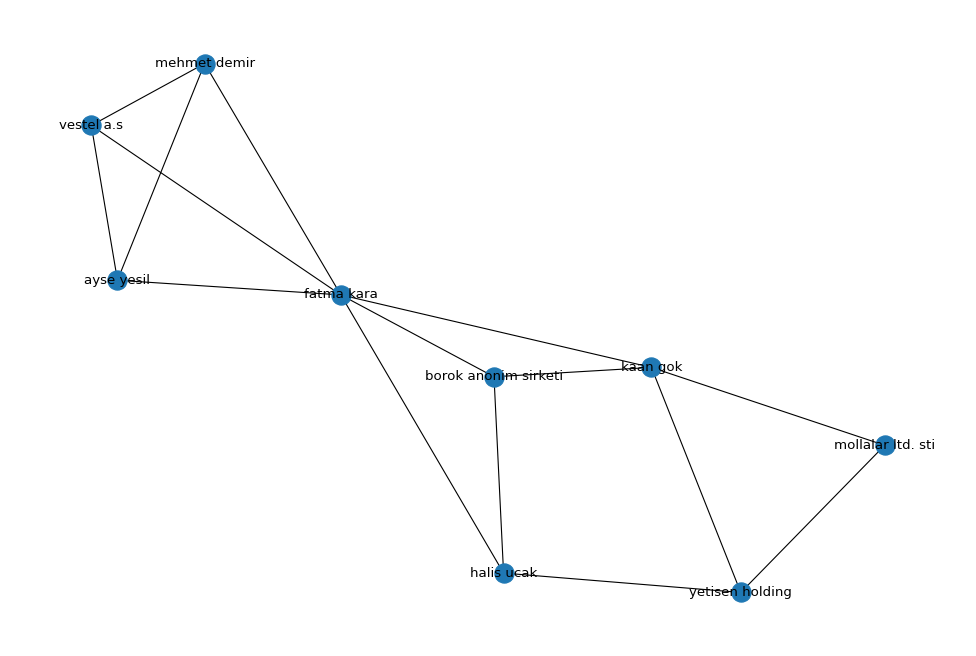

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)


G = nx.Graph()
G.add_edges_from(list_of_relations)


nx.draw(G, cmap = plt.get_cmap('jet'), labels= id2name, with_labels = True)
plt.show()